In [88]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



#__About__The__dataset
#Relationship of Strength to Performance among Shot Putters
#1 Repetition Maximum power clean (weight lifting) and personal best shot putt for 28 female collegiate shot putters'''

In [89]:
df = pd.read_csv('shotputt_powerclean.csv')

In [90]:
df.head()


,power.clean,shot.putt
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2


In [91]:
df.isnull().any()

power.clean    False
shot.putt      False
dtype: bool

In [92]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1].values

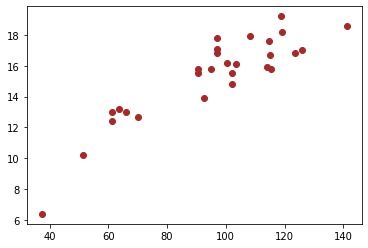

In [93]:
plt.scatter(X, y, color = 'brown')

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

# With Linear Regression

In [95]:
# Fitting Linear Regression to the dataset

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

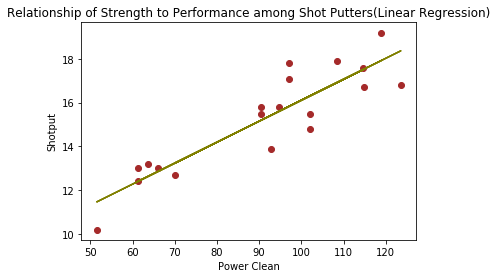

In [96]:
plt.scatter(X_train, y_train, color = 'brown')
plt.plot(X_train, lin_reg.predict(X_train), color = 'olive')
plt.title('Relationship of Strength to Performance among Shot Putters(Linear Regression)')
plt.ylabel("Shotput")
plt.xlabel('Power Clean')
plt.show()

In [97]:
accuracy = lin_reg.score(X_test,y_test)
print((accuracy*100).round(2))

75.94


## 75.9 % Accuracy with Simple Linear Regression

# Now We will use Polynomial Regression

In [105]:
# Fitting Polynomial Regression to the dataset
#using maxim and deg variable to find the model with maximum accuracy and it's corresponding degree

maxim =0
for i in range(1,11):
    
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree= i)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg.fit(X_poly, y_train)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)
    
    
    accuracy2 = lin_reg_2.score(poly_reg.fit_transform(X_test),y_test)
    print("Accuracy with Degree",i,"--->",(accuracy2*100).round(2),"%")
    if(maxim<accuracy2):
        maxim = accuracy2
        deg = i

Accuracy with Degree 1 ---> 75.94 %
Accuracy with Degree 2 ---> 88.55 %
Accuracy with Degree 3 ---> 91.2 %
Accuracy with Degree 4 ---> 11.92 %
Accuracy with Degree 5 ---> 15.19 %
Accuracy with Degree 6 ---> -8544.64 %
Accuracy with Degree 7 ---> -14699.48 %
Accuracy with Degree 8 ---> -33140.14 %
Accuracy with Degree 9 ---> -79011.01 %
Accuracy with Degree 10 ---> -178243.05 %


In [106]:
print("maximum accuracy we could get is--->",maxim.round(2)*100,"   with degree--->",deg)

maximum accuracy we could get is---> 91.0    with degree---> 3


In [107]:
#Refit the model with optimal degree

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= deg)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

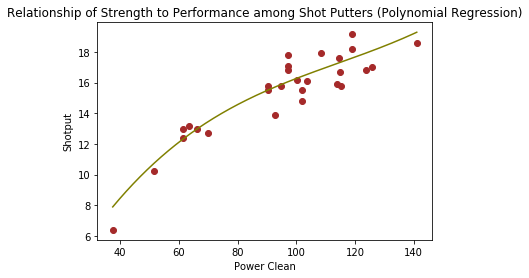

In [108]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'brown')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'olive')
plt.title('Relationship of Strength to Performance among Shot Putters (Polynomial Regression)')
plt.xlabel('Power Clean')
plt.ylabel('Shotput')
plt.show()
    

# 91% Accuracy with polynomial regression of degreee 3

In [121]:
#Let's check a random prediction

lin_reg_2.predict(poly_reg.fit_transform([[120]]))

array([17.66688131])

In [122]:
lin_reg.predict([[120]])

array([18.02378016])

In [104]:
# We can see that our polynaomial regression model gives more accurate prediction.